# RIDGE Regularization  
[source](https://youtu.be/aEow1QoTLo0?list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH)  
Technique to reduce **overfitting**.  <br>
#### What is overfitting?  
When ML model performs excpetionally well on training data but not so well on testing data. that model is overfitted.  Model learns noise of trainig data instead of patterns.
<br>
##### Here we will only talk about Regularization in terms of LinearRegression. There are other algorithms where it is used to reduce overfitting as well. <br><br>
**How is overfiting possible in simple linear regression? cuz ther is just one plain stright line.**  
if the distribution of data isn't done right, like let's say you got only two trainig data points which happen to be outliers... your best fit line will pass through those leaving test data to the otherside<br><br>
`y = mx + b`  
Now overfitting in here can be simply described as coefficient(m) which tells us how much y depends on x. 
* If value of m is reduced to 0, it means that there is no need of x in calculating the y (`mx = 0`), model is underfitted.
* If value of m is too high, so that it reaches parallel to y axis(`mx>>b`), it means that other values don't matter much and can be ignored, thats when our model is overfitted
<br><br>

So now, we know that if our model is overfitted we have to reduce the value of m upto the optimal point. not going too far so that it becomes underfitted.
<br><br>

---

### How does Regularization solve this problem?  
Adds another hypeparameter to the error function. let's see how adding this extra term into error function can convince the model to choose optimal line for test data and leave the overfitted line on training data.  
Take a random line from the coordinates (meaning take value of m and b at random)... and then add the hyperparameter (`lambda( m^2 )` also called **shrinkage coefficient**. In the example value of lambda is 1.) to the loss functions of both the overfitted line by model and the supposed line. if the resultant error is lower in supposed line, the automatically shifts to that line even though its not on the trainig data.
<br><br>
![ytss](assets/losses.png)
<br><br>
Look at the bottom-left of ss, where LN and LR are calculated. LR is for the supposed line (we usually suppoe a line with less slope but not always that case) and LN is model chosen overfitted line. now here the LN is passing exactly on top of all training data points to error will be exactly 0. thats why there is only m^2 taken there and in the right error function is calcuated for both of the points and then m^2 is added, and then the resultant error is compared between both.  
**Although the bias increased a little, but the variance significantly reduced**  <br><br>

---

Why is RIDGE Regularization also called L2 Regularization. because here the hyperparameter has all the coefficients with squares on them like lets say there is a 3 dimensional data the hyperparameter being added would be : (`hyperparameter = lambda((m1)^2 + (m2)^2)`)  <br>
Just for remembring:  
Because of the square being added in loss function its called L2

## Code


In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [6]:
data = load_diabetes()
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [7]:
X = data.data
y = data.target

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [10]:
from sklearn.metrics import r2_score,mean_squared_error
print('R2_score error',r2_score(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

R2_score error 0.5188113124539246
RMSE 48.727137609532534


In [11]:
from sklearn.linear_model import Ridge
ri = Ridge(alpha=0.0001) # this alpha is actually the lambda we studued above 
ri.fit(X_train,y_train)
print('R2_score error',r2_score(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

R2_score error 0.5188113124539246
RMSE 48.727137609532534


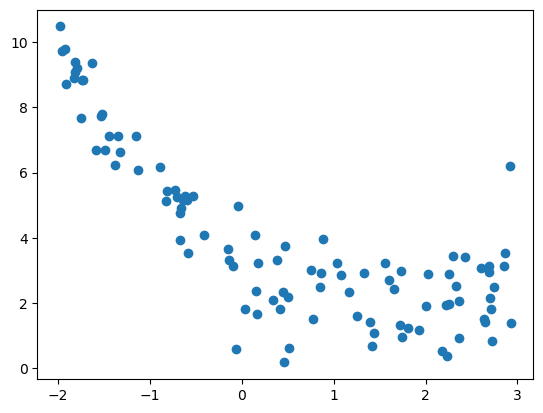

In [14]:
m = 100
x1 = 5 * np.random.rand(m,1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m,1) 
plt.scatter(x1,x2)
plt.show()

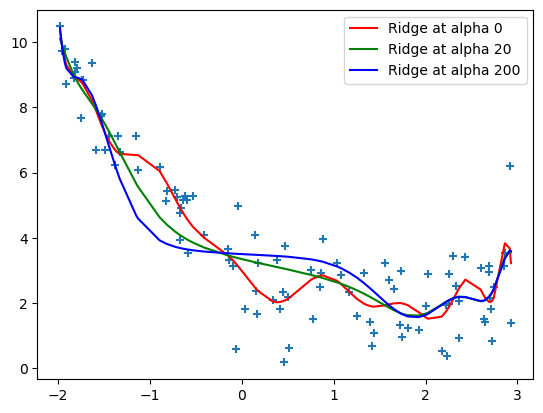

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_pred_ridge(x1,x2,alpha):
    model = Pipeline([
        ('poly_features',PolynomialFeatures(degree=16)),
        ('ridge',Ridge(alpha = alpha))
    ])
    model.fit(x1,x2)
    pred = model.predict(x1)
    return pred

alpha = [0, 20 , 200]
cs = ['r','g','b']
plt.scatter(x1,x2,marker='+')
for alpha,cs in zip(alpha,cs):
    pred = get_pred_ridge(x1,x2,alpha)
    plt.plot(sorted(x1),pred[np.argsort(x1.ravel())],color=cs,label=f'Ridge at alpha {alpha}')

plt.legend()
plt.show()

First we took degree 16 to kinfa make it a little bit more overfitted to see if ridge regression's process and progress.  
alpha high means underfitting. why? because it reduces values of coefficients, alpha 0 means pure 16 degree polynomial-linear-regression, alpha 20 is optimal value, the balanced one.